In [21]:
import tensorflow as tf
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import re

In [2]:
Path.ls = lambda x: list(x.iterdir())

In [3]:
data_path = Path('/project/cq-training-1/project2/data')

In [4]:
data_path.ls()

[PosixPath('/project/cq-training-1/project2/data/unaligned.en'),
 PosixPath('/project/cq-training-1/project2/data/unaligned.fr'),
 PosixPath('/project/cq-training-1/project2/data/train.lang2'),
 PosixPath('/project/cq-training-1/project2/data/train.lang1')]

In [14]:
with open(data_path/'train.lang1') as f:
    eng_data = f.readlines()
    
with open(data_path/'train.lang2') as f:
    fr_data = f.readlines()

In [15]:
len(eng_data),len(fr_data)

(11000, 11000)

In [443]:
# Random print
idx = np.random.choice(len(eng_data),size=5)
for i in idx:
    print(i)
    print(eng_data[i].rstrip())
    print(fr_data[i])

968
it is a part i suppose of the urban middle - class northern european dream – the pursuit of the sun by day and silence by night
Cela fait partie je crois du rêve des classes moyennes urbaines du nord de l' Europe : le soleil pendant la journée et le silence la nuit .

8047
thank you mr provan
Merci , Monsieur Provan .

10619
the foundation has been laid for creating a common european energy market based on rules set out in detail in the binding network codes
Les fondations d' un marché commun européen de l' énergie , basé sur des règles dont les détails sont fixés dans des codes de réseau contraignants , ont été posées .

3964
there was not a flashlight not a lantern not a candle -- pitch black
il n' y avait pas de lampes de poche , pas une lanterne , pas une bougie . Noir total .

1260
it is therefore a problem for society as a whole
La société est donc concernée dans son ensemble .



1) Remove spaces between number or numbers with ',' or '.' in between  
2) Replace numbers with tokens  
3) words begining with caps  
4) words in caps  

In [252]:
eng_count,fr_count = [],[]
for i,(eng,fr) in enumerate(zip(eng_data,fr_data)):
    eng_count.append(len(eng.rstrip().split(" ")))
    fr_count.append(len(fr.rstrip().split(" "))) 

In [253]:
max(eng_count),max(fr_count)

(95, 112)

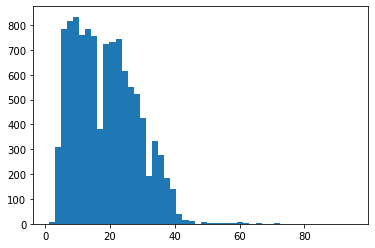

In [255]:
plt.hist(eng_count,bins=50)
plt.show()

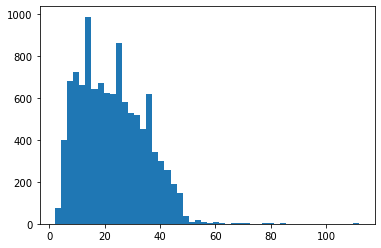

In [256]:
plt.hist(fr_count,bins=50)
plt.show()

In [572]:
class ExtraProcessing():
    
    def __init__(self):
        self.BOS,self.EOS,self.TK_MAJ,self.TK_UP,self.TK_NUM = 'xxstart', 'xxend', 'xxmaj','xxup', 'xxnum'
        
    def regx(self,x):
        # Remove space, comma or point  between numbers
        x = re.sub(r"(\d+)[\s+|,|.](\d+)",r"\1\2",x)
        
        # enumerate for number tokens
        #numerate = lambda m, i=iter(range(10)):f"{self.TK_NUM}_{str(next(i))}"
        
        # Replace numbers with TK_NUM
        x = re.sub("\d+",self.TK_NUM,x)
        # Remove some punctuation
        PUNCT = '#&\()*+/<=>@[\\]^_{|}~'
        table = str.maketrans("","",PUNCT)
        x = x.translate(table)
        x = re.sub("\.\.+","",x)
        # Add space between '-' and words
        x = re.sub(r"(-)(\w)",r"\1 \2",x)
        x = re.sub(r"(\w)(-)",r"\1 \2",x)
        # Remove unecessary space
        x = re.sub("\s\s+"," ",x)
        return x
        
    def start_end(self,x):
        x.insert(0,self.BOS)
        x.append(self.EOS)
        return x
        
    def replace_all_caps(self,x):
        "Replace tokens in ALL CAPS in `x` by their lower version and add `TK_UP` before."
        res = []
        for t in x:
            if t.isupper() and len(t) > 1: res.append(self.TK_UP); res.append(t.lower())
            else: res.append(t)
        return res

    def deal_caps(self,x):
        "Replace all Capitalized tokens in `x` by their lower version and add `TK_MAJ` before."
        res = []
        for t in x:
            if t == '': continue
            if t[0].isupper() and len(t) > 1 and (t[1:].islower() or (t[1] == "’" or t[1] == "'" )): 
                res.append(self.TK_MAJ)
            res.append(t.lower())
        return res
    
    def process(self,x):
        x = self.regx(x.strip())
        x = x.split()
        post = [self.deal_caps,self.replace_all_caps,self.start_end]
        for p in post:
            x = p(x)
        return ' '.join(x)

In [573]:
ex = ExtraProcessing()

In [574]:
all_fr = []
for fr_sent in fr_data:
    all_fr.append(ex.process(fr_sent))
    
all_eng = []
for eng_sent in eng_data:
    all_eng.append(ex.process(eng_sent))

In [575]:
# Random print
idx = np.random.choice(len(eng_data),size=5)
for i in idx:
    print(i)
    print(all_eng[i])
    print(all_fr[i])

3136
xxstart actually you know that old philosophical thing if a tree falls in a forest and nobody hears it did it happen remember that old chestnut xxend
xxstart xxmaj en fait , vous savez cette vieille histoire philosophique , si un arbre tombe dans la forêt et personne ne l' entend est - ce que c' est arrivé ? xxmaj vous vous rappelez cette histoire ? xxend
3609
xxstart i am a pro - european i have always been one and i will remain one xxend
xxstart xxmaj je suis pro - européen ; je l’ ai toujours été et je le resterai . xxend
5031
xxstart the majority of the world ’s malnourished children live in india xxend
xxstart xxmaj c’ est en xxmaj inde que vit la majorité des enfants qui souffrent de malnutrition dans le monde . xxend
1257
xxstart used to be there were two mustards french 's and gulden 's xxend
xxstart xxmaj on était habitué à deux types de moutardes . xxmaj la xxmaj french et la xxmaj gulden . xxend
10322
xxstart most importantly we would not have to allow children to be se